In [1]:
import tensorflow as tf
from Poisson_CNN import *
from generate_cholesky_soln import generate_dataset
from generate_laplace_soln import generate_random_boundaries
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.set_floatx('float32')

In [5]:
bc_nn_params = {'x_output_resolution' : 64}
mod = Poisson_CNN(n_quadpts = 27, bc_nn_parameters = bc_nn_params, mse_component_weight = 1e+1, bc_nn_weights = None, homogeneous_poisson_nn_weights = 'Homogeneous_Poisson_NN_2.h5', bc_nn_trainable=True, homogeneous_poisson_nn_trainable=False)
from IPython.display import clear_output
mod([tf.random.uniform((10,1,64,64), dtype = tf.keras.backend.floatx()), tf.random.uniform((10,1,64), dtype = tf.keras.backend.floatx()), tf.random.uniform((10,1,64), dtype = tf.keras.backend.floatx()), tf.random.uniform((10,1,64), dtype = tf.keras.backend.floatx()), tf.random.uniform((10,1,64), dtype = tf.keras.backend.floatx()), tf.random.uniform((10,1), dtype = tf.keras.backend.floatx())])
clear_output()
mod.load_weights('asd.h5')

In [3]:
def dataset_generator():
    batch_size = 75
    while True:
        nx = 64#np.random.randint(64,128)
        ny = 64#np.random.randint(64,128)
        dx = 0.1*(np.random.rand() + 0.01)
        boundaries = generate_random_boundaries(nx, ny, batch_size=batch_size, return_with_expanded_dims=False)
        soln, rhs = generate_dataset(batch_size, [nx,ny], dx, boundaries=boundaries, initial_smoothness=np.random.randint(5,20))
        for key in boundaries.keys():
            boundaries[key] = tf.expand_dims(boundaries[key], axis = 1)
        yield (rhs, boundaries['left'], boundaries['top'], boundaries['right'], boundaries['bottom'], dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln
        #yield (rhs, boundaries, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln

In [4]:
cb = [tf.keras.callbacks.ModelCheckpoint('asd.h5', monitor='mse', verbose=1, save_best_only=True, save_weights_only=True), tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', min_lr = 1e-15, verbose = True, patience = 3)]
mod.compile(loss = mod.integral_loss, optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), metrics = ['mse', 'mae'])
mod.run_eagerly = True
mod.fit_generator(generator=dataset_generator(), steps_per_epoch=200, epochs=5000, validation_data=dataset_generator(), validation_steps=3, callbacks=cb)


Epoch 1/5000
199/200 [============================>.] - ETA: 5s - loss: 0.2140 - mse: 0.0065 - mae: 0.0511 
Epoch 00001: mse improved from inf to 0.00489, saving model to asd.h5
200/200 [==============================] - 1203s 6s/step - loss: 0.2139 - mse: 0.0065 - mae: 0.0510 - val_loss: 0.1274 - val_mse: 0.0037 - val_mae: 0.0417
Epoch 2/5000
199/200 [============================>.] - ETA: 5s - loss: 0.1875 - mse: 0.0038 - mae: 0.0404 
Epoch 00002: mse improved from 0.00489 to 0.00355, saving model to asd.h5
200/200 [==============================] - 1195s 6s/step - loss: 0.1870 - mse: 0.0038 - mae: 0.0404 - val_loss: 0.1810 - val_mse: 0.0027 - val_mae: 0.0328
Epoch 3/5000
199/200 [============================>.] - ETA: 5s - loss: 0.1725 - mse: 0.0026 - mae: 0.0334 
Epoch 00003: mse improved from 0.00355 to 0.00292, saving model to asd.h5
200/200 [==============================] - 1189s 6s/step - loss: 0.1718 - mse: 0.0026 - mae: 0.0334 - val_loss: 0.1058 - val_mse: 0.0022 - val_mae: 

Epoch 25/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0813 - mse: 8.5101e-04 - mae: 0.0179 
Epoch 00025: mse did not improve from 0.00083
200/200 [==============================] - 1182s 6s/step - loss: 0.0812 - mse: 8.5088e-04 - mae: 0.0179 - val_loss: 0.0829 - val_mse: 8.1236e-04 - val_mae: 0.0175
Epoch 26/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0804 - mse: 8.5652e-04 - mae: 0.0178 
Epoch 00026: mse did not improve from 0.00083
200/200 [==============================] - 1174s 6s/step - loss: 0.0809 - mse: 8.5646e-04 - mae: 0.0178 - val_loss: 0.1100 - val_mse: 8.9750e-04 - val_mae: 0.0189
Epoch 27/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0821 - mse: 8.6935e-04 - mae: 0.0180 
Epoch 00027: mse did not improve from 0.00083

Epoch 00027: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
200/200 [==============================] - 1185s 6s/step - loss: 0.0824 - mse: 8.6920e-04 - mae: 0.0180 - val_loss: 

Epoch 49/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0844 - mse: 8.4803e-04 - mae: 0.0179 
Epoch 00049: mse did not improve from 0.00083

Epoch 00049: ReduceLROnPlateau reducing learning rate to 1.0000001518582595e-15.
200/200 [==============================] - 1197s 6s/step - loss: 0.0841 - mse: 8.4810e-04 - mae: 0.0179 - val_loss: 0.1034 - val_mse: 0.0010 - val_mae: 0.0193
Epoch 50/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0781 - mse: 8.4439e-04 - mae: 0.0174 
Epoch 00050: mse did not improve from 0.00083
200/200 [==============================] - 1191s 6s/step - loss: 0.0781 - mse: 8.4436e-04 - mae: 0.0174 - val_loss: 0.0582 - val_mse: 7.4126e-04 - val_mae: 0.0161
Epoch 51/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0881 - mse: 8.9609e-04 - mae: 0.0185 
Epoch 00051: mse did not improve from 0.00083
200/200 [==============================] - 1193s 6s/step - loss: 0.0879 - mse: 8.9593e-04 - mae: 0.0185 - val_loss: 0.1

Epoch 73/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0883 - mse: 8.8770e-04 - mae: 0.0184 
Epoch 00073: mse did not improve from 0.00082
200/200 [==============================] - 1190s 6s/step - loss: 0.0885 - mse: 8.8757e-04 - mae: 0.0184 - val_loss: 0.0674 - val_mse: 7.6320e-04 - val_mae: 0.0170
Epoch 74/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0861 - mse: 9.2208e-04 - mae: 0.0190 
Epoch 00074: mse did not improve from 0.00082
200/200 [==============================] - 1196s 6s/step - loss: 0.0860 - mse: 9.2161e-04 - mae: 0.0190 - val_loss: 0.0944 - val_mse: 9.5749e-04 - val_mae: 0.0184
Epoch 75/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0804 - mse: 8.2935e-04 - mae: 0.0174 
Epoch 00075: mse did not improve from 0.00082

Epoch 00075: ReduceLROnPlateau reducing learning rate to 1e-15.
200/200 [==============================] - 1197s 6s/step - loss: 0.0802 - mse: 8.2967e-04 - mae: 0.0174 - val_loss: 0.1247 - val_mse

Epoch 97/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0775 - mse: 8.7093e-04 - mae: 0.0179 
Epoch 00097: mse did not improve from 0.00082
200/200 [==============================] - 1188s 6s/step - loss: 0.0776 - mse: 8.7069e-04 - mae: 0.0179 - val_loss: 0.1281 - val_mse: 9.9236e-04 - val_mae: 0.0203
Epoch 98/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0827 - mse: 8.9555e-04 - mae: 0.0183 
Epoch 00098: mse did not improve from 0.00082
200/200 [==============================] - 1195s 6s/step - loss: 0.0828 - mse: 8.9536e-04 - mae: 0.0183 - val_loss: 0.1328 - val_mse: 0.0011 - val_mae: 0.0212
Epoch 99/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0834 - mse: 8.5693e-04 - mae: 0.0178 
Epoch 00099: mse did not improve from 0.00082

Epoch 00099: ReduceLROnPlateau reducing learning rate to 1e-15.
200/200 [==============================] - 1190s 6s/step - loss: 0.0834 - mse: 8.5697e-04 - mae: 0.0178 - val_loss: 0.0465 - val_mse: 7.

Epoch 121/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0859 - mse: 8.8892e-04 - mae: 0.0182 
Epoch 00121: mse did not improve from 0.00079

Epoch 00121: ReduceLROnPlateau reducing learning rate to 1e-15.
200/200 [==============================] - 1193s 6s/step - loss: 0.0856 - mse: 8.8880e-04 - mae: 0.0182 - val_loss: 0.0979 - val_mse: 9.4068e-04 - val_mae: 0.0192
Epoch 122/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0859 - mse: 8.9671e-04 - mae: 0.0184 
Epoch 00122: mse did not improve from 0.00079
200/200 [==============================] - 1197s 6s/step - loss: 0.0857 - mse: 8.9653e-04 - mae: 0.0184 - val_loss: 0.0482 - val_mse: 6.9064e-04 - val_mae: 0.0153
Epoch 123/5000
199/200 [============================>.] - ETA: 5s - loss: 0.0831 - mse: 8.5526e-04 - mae: 0.0178 
Epoch 00123: mse did not improve from 0.00079
200/200 [==============================] - 1200s 6s/step - loss: 0.0829 - mse: 8.5529e-04 - mae: 0.0178 - val_loss: 0.1022 - val_

Epoch 145/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0857 - mse: 9.3367e-04 - mae: 0.0189 
Epoch 00145: mse did not improve from 0.00079

Epoch 00145: ReduceLROnPlateau reducing learning rate to 1e-15.
200/200 [==============================] - 1220s 6s/step - loss: 0.0855 - mse: 9.3308e-04 - mae: 0.0189 - val_loss: 0.0635 - val_mse: 8.0495e-04 - val_mae: 0.0162
Epoch 146/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0859 - mse: 8.9483e-04 - mae: 0.0184 
Epoch 00146: mse did not improve from 0.00079
200/200 [==============================] - 1223s 6s/step - loss: 0.0856 - mse: 8.9469e-04 - mae: 0.0184 - val_loss: 0.1065 - val_mse: 8.3767e-04 - val_mae: 0.0189
Epoch 147/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0888 - mse: 8.7087e-04 - mae: 0.0181 
Epoch 00147: mse did not improve from 0.00079
200/200 [==============================] - 1223s 6s/step - loss: 0.0891 - mse: 8.7101e-04 - mae: 0.0181 - val_loss: 0.0714 - val_

Epoch 169/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0817 - mse: 8.3051e-04 - mae: 0.0176 
Epoch 00169: mse did not improve from 0.00079

Epoch 00169: ReduceLROnPlateau reducing learning rate to 1e-15.
200/200 [==============================] - 1222s 6s/step - loss: 0.0819 - mse: 8.3064e-04 - mae: 0.0176 - val_loss: 0.0451 - val_mse: 7.1911e-04 - val_mae: 0.0160
Epoch 170/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0809 - mse: 8.9156e-04 - mae: 0.0182 
Epoch 00170: mse did not improve from 0.00079
200/200 [==============================] - 1225s 6s/step - loss: 0.0807 - mse: 8.9120e-04 - mae: 0.0182 - val_loss: 0.0763 - val_mse: 6.8836e-04 - val_mae: 0.0162
Epoch 171/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0820 - mse: 8.7870e-04 - mae: 0.0181 
Epoch 00171: mse did not improve from 0.00079
200/200 [==============================] - 1225s 6s/step - loss: 0.0821 - mse: 8.7848e-04 - mae: 0.0181 - val_loss: 0.0806 - val_

Epoch 193/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0833 - mse: 8.7152e-04 - mae: 0.0181 
Epoch 00193: mse did not improve from 0.00079

Epoch 00193: ReduceLROnPlateau reducing learning rate to 1e-15.
200/200 [==============================] - 1224s 6s/step - loss: 0.0831 - mse: 8.7133e-04 - mae: 0.0181 - val_loss: 0.0609 - val_mse: 8.6454e-04 - val_mae: 0.0168
Epoch 194/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0773 - mse: 8.3904e-04 - mae: 0.0174 
Epoch 00194: mse did not improve from 0.00079
200/200 [==============================] - 1232s 6s/step - loss: 0.0770 - mse: 8.3900e-04 - mae: 0.0174 - val_loss: 0.0950 - val_mse: 9.0418e-04 - val_mae: 0.0191
Epoch 195/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0840 - mse: 8.4074e-04 - mae: 0.0176 
Epoch 00195: mse did not improve from 0.00079
200/200 [==============================] - 1225s 6s/step - loss: 0.0842 - mse: 8.4093e-04 - mae: 0.0176 - val_loss: 0.0718 - val_

Epoch 217/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0891 - mse: 8.8550e-04 - mae: 0.0183 
Epoch 00217: mse did not improve from 0.00079

Epoch 00217: ReduceLROnPlateau reducing learning rate to 1e-15.
200/200 [==============================] - 1221s 6s/step - loss: 0.0888 - mse: 8.8544e-04 - mae: 0.0183 - val_loss: 0.0745 - val_mse: 7.9814e-04 - val_mae: 0.0171
Epoch 218/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0848 - mse: 8.6776e-04 - mae: 0.0181 
Epoch 00218: mse did not improve from 0.00079
200/200 [==============================] - 1220s 6s/step - loss: 0.0845 - mse: 8.6777e-04 - mae: 0.0181 - val_loss: 0.1244 - val_mse: 0.0011 - val_mae: 0.0210
Epoch 219/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0805 - mse: 8.6161e-04 - mae: 0.0179 
Epoch 00219: mse did not improve from 0.00079
200/200 [==============================] - 1220s 6s/step - loss: 0.0801 - mse: 8.6140e-04 - mae: 0.0179 - val_loss: 0.0500 - val_mse:

Epoch 241/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0762 - mse: 8.2434e-04 - mae: 0.0174 
Epoch 00241: mse did not improve from 0.00079

Epoch 00241: ReduceLROnPlateau reducing learning rate to 1e-15.
200/200 [==============================] - 1228s 6s/step - loss: 0.0762 - mse: 8.2429e-04 - mae: 0.0174 - val_loss: 0.1295 - val_mse: 0.0011 - val_mae: 0.0208
Epoch 242/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0818 - mse: 8.7677e-04 - mae: 0.0178 
Epoch 00242: mse did not improve from 0.00079
200/200 [==============================] - 1221s 6s/step - loss: 0.0816 - mse: 8.7669e-04 - mae: 0.0178 - val_loss: 0.0798 - val_mse: 8.4996e-04 - val_mae: 0.0170
Epoch 243/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0840 - mse: 8.4980e-04 - mae: 0.0177 
Epoch 00243: mse did not improve from 0.00079
200/200 [==============================] - 1221s 6s/step - loss: 0.0838 - mse: 8.4994e-04 - mae: 0.0177 - val_loss: 0.1065 - val_mse:

Epoch 265/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0912 - mse: 8.7195e-04 - mae: 0.0180 
Epoch 00265: mse did not improve from 0.00079

Epoch 00265: ReduceLROnPlateau reducing learning rate to 1e-15.
200/200 [==============================] - 1215s 6s/step - loss: 0.0911 - mse: 8.7213e-04 - mae: 0.0180 - val_loss: 0.0690 - val_mse: 8.1492e-04 - val_mae: 0.0169
Epoch 266/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0831 - mse: 8.7249e-04 - mae: 0.0182 
Epoch 00266: mse did not improve from 0.00079
200/200 [==============================] - 1220s 6s/step - loss: 0.0827 - mse: 8.7249e-04 - mae: 0.0182 - val_loss: 0.0761 - val_mse: 8.4093e-04 - val_mae: 0.0175
Epoch 267/5000
199/200 [============================>.] - ETA: 6s - loss: 0.0829 - mse: 8.4559e-04 - mae: 0.0176 
Epoch 00267: mse did not improve from 0.00079
200/200 [==============================] - 1221s 6s/step - loss: 0.0834 - mse: 8.4575e-04 - mae: 0.0176 - val_loss: 0.0402 - val_

KeyboardInterrupt: 

In [6]:
i = dataset_generator()
inp, soln = next(i)

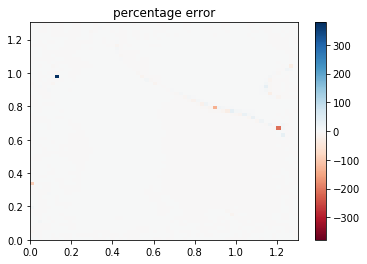

In [26]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*inp[-1][0,0], soln.shape[-2]), np.linspace(0, soln.shape[-1]*inp[-1][0,0], soln.shape[-1]), indexing = 'ij')
p_r = np.random.randint(0,soln.shape[0])
#z = soln[p_r,0,...]
#z = mod(inp)[p_r,0,...]
#z = tf.cast(mod(inp)[p_r,0,...], tf.float64)-soln[p_r,0,...]
z = tf.divide(tf.cast(mod(inp)[p_r,0,...], tf.float64)-soln[p_r,0,...], soln[p_r,0,...])
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('percentage error')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

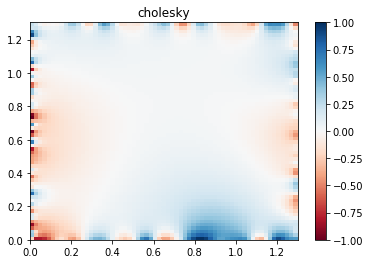

In [19]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*inp[-1][0,0], soln.shape[-2]), np.linspace(0, soln.shape[-1]*inp[-1][0,0], soln.shape[-1]), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
z = soln[p_r,0,...]
#z = mod(inp)[p_r,0,...]
#z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = tf.divide(mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]-soln[p_r,0,...], soln[p_r,0,...])
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('cholesky')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [2]:
dbnn = Dirichlet_BC_NN_2B(data_format = 'channels_first', mse_component_weight = 1e+1, x_output_resolution = 64)
from generate_laplace_soln import generate_laplace_soln
def dbnn_dataset_generator():
    while True:
        nx = 64#np.random.randint(64,128)
        ny = 64#np.random.randint(64,128)
        boundaries, soln, dx = generate_laplace_soln(batch_size=75, nonzero_boundaries=['left'], smoothness=np.random.randint(5,20), nx = nx, ny = ny)
        #print(boundaries)
        yield [boundaries['left'], dx * tf.ones((soln.shape[0],1), dtype = 'float64')], soln
s = dbnn_dataset_generator()
inp,soln = next(s)
dbnn(inp)
dbnn.load_weights('Dirichlet_BC_NN.h5')
from IPython.display import clear_output
clear_output()

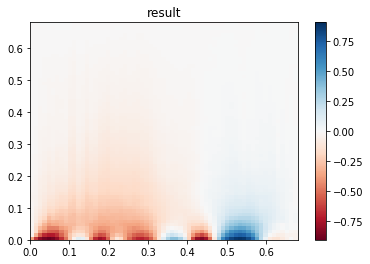

In [9]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*inp[-1][0,0], soln.shape[-2]), np.linspace(0, soln.shape[-1]*inp[-1][0,0], soln.shape[-1]), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
#z = soln[p_r,0,...]
from Poisson_CNN import channels_first_rot90, channels_first_flip_left_right, channels_first_flip_up_down
z = channels_first_flip_up_down(channels_first_rot90(dbnn(inp), k = 3))[p_r,0,...]
#z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = tf.divide(mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]-soln[p_r,0,...], soln[p_r,0,...])
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [5]:
mod.save_weights('asd.h5')